# [Python 股票分析教學 ：Stocker 強大的股價預測分析工具 (附完整程式碼)](https://weikaiwei.com/python/stocker/ )

## 都會阿嬤 https://weikaiwei.com

# 第零部份 安裝相關套件

In [1]:
# 安裝常用財經套件
!pip install -U quandl numpy pandas matplotlib pystan pytrends plotly yfinance

In [2]:
# 2022年更新 安裝 prophet
!pip install prophet

# 第一部份 下載資料 （使用 yfinance）

In [3]:
import pandas as pd
import yfinance as yf

stockNo = "2330.TW"
start_date = '2015-01-01'
df = yf.download(stockNo, start=start_date)
df = df.reset_index()

[*********************100%***********************]  1 of 1 completed


In [4]:
# 印出表格
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-05,140.5,140.5,137.5,139.5,108.931129,32046000
1,2015-01-06,137.5,137.5,133.0,133.5,104.245911,66778000
2,2015-01-07,133.5,135.0,133.5,134.0,104.636330,43703000
3,2015-01-08,136.5,138.0,136.0,138.0,107.759819,42491000
4,2015-01-09,135.0,135.5,133.0,134.0,104.636330,61558000
...,...,...,...,...,...,...,...
1879,2022-09-19,472.0,473.0,466.5,467.0,467.000000,17182380
1880,2022-09-20,470.5,478.0,470.0,476.5,476.500000,19842582
1881,2022-09-21,473.5,475.5,468.5,471.0,471.000000,24154633
1882,2022-09-22,462.0,468.0,459.0,464.5,464.500000,29702508


# 第二部份 使用 Stocker 預測股價

In [5]:
from stocker import Stocker
stock = Stocker(stockNo, df)

stockNo : 2330.TW Stocker Initialized. Data covers 2015-01-05 00:00:00 to 2022-09-23 00:00:00.


## 畫出歷史股價

Maximum Adj. Close = 683.00 on 2022-01-17 00:00:00.
Minimum Adj. Close = 115.00 on 2015-08-24 00:00:00.
Current Adj. Close = 455.00 on 2022-09-23 00:00:00.



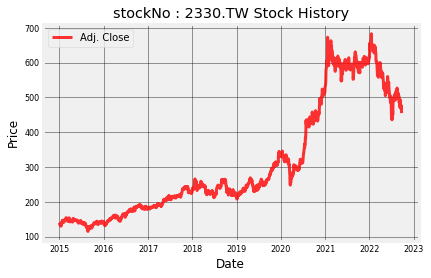

In [6]:
stock.plot_stock()

## 使用 Prophet 預言家模型預測股價

22:36:48 - cmdstanpy - INFO - Chain [1] start processing
22:36:48 - cmdstanpy - INFO - Chain [1] done processing


Predicted Price on 2022-10-03 00:00:00 = $448.29


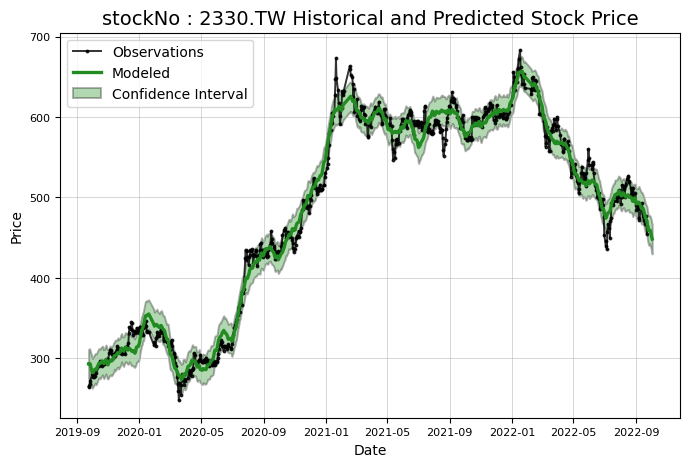

In [7]:
model, model_data = stock.create_prophet_model(days=10)

22:36:49 - cmdstanpy - INFO - Chain [1] start processing
22:36:49 - cmdstanpy - INFO - Chain [1] done processing



Prediction Range: 2021-09-23 00:00:00 to 2022-09-23 00:00:00.

Predicted price on 2022-09-22 00:00:00 = $604.80.
Actual price on    2022-09-22 00:00:00 = $464.50.

Average Absolute Error on Training Data = $9.48.
Average Absolute Error on Testing  Data = $50.43.

When the model predicted an increase, the price increased 45.38% of the time.
When the model predicted a  decrease, the price decreased  56.52% of the time.

The actual value was within the 80% confidence interval 96.75% of the time.


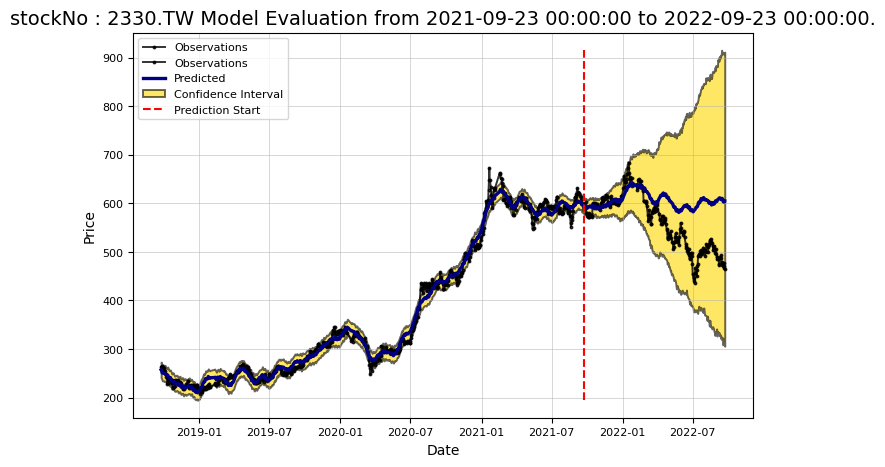

In [8]:
stock.evaluate_prediction()

22:36:50 - cmdstanpy - INFO - Chain [1] start processing
22:36:50 - cmdstanpy - INFO - Chain [1] done processing
22:36:50 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
Optimization terminated abnormally. Falling back to Newton.
22:36:50 - cmdstanpy - INFO - Chain [1] start processing
22:36:52 - cmdstanpy - INFO - Chain [1] done processing
22:36:53 - cmdstanpy - INFO - Chain [1] start processing
22:36:53 - cmdstanpy - INFO - Chain [1] done processing
22:36:54 - cmdstanpy - INFO - Chain [1] start processing
22:36:54 - cmdstanpy - INFO - Chain [1] done processing
22:36:54 - cmdstanpy - INFO - Chain [1] start processing
22:36:55 - cmdstanpy - INFO - Chain [1] done processing


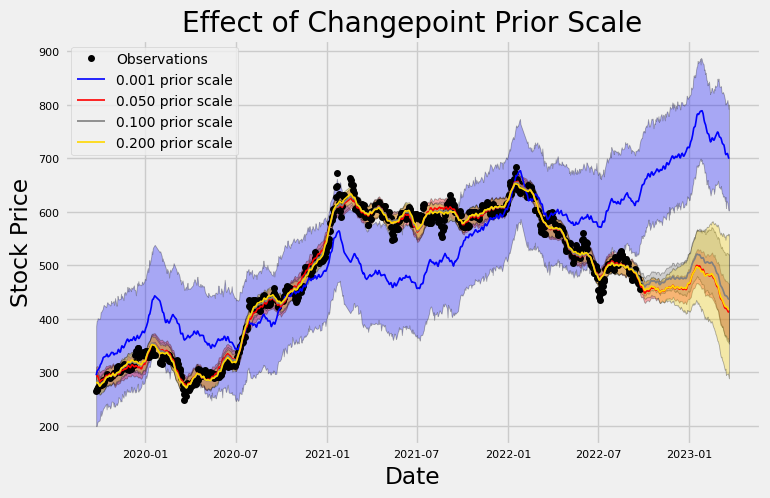

In [9]:
stock.changepoint_prior_analysis(changepoint_priors=[0.001, 0.05, 0.1, 0.2])

In [10]:
stock.changepoint_prior_scale = 0.5

22:36:55 - cmdstanpy - INFO - Chain [1] start processing
22:36:56 - cmdstanpy - INFO - Chain [1] done processing



Prediction Range: 2021-09-23 00:00:00 to 2022-09-23 00:00:00.

Predicted price on 2022-09-22 00:00:00 = $675.96.
Actual price on    2022-09-22 00:00:00 = $464.50.

Average Absolute Error on Training Data = $7.34.
Average Absolute Error on Testing  Data = $99.93.

When the model predicted an increase, the price increased 45.71% of the time.
When the model predicted a  decrease, the price decreased  58.10% of the time.

The actual value was within the 80% confidence interval 86.18% of the time.


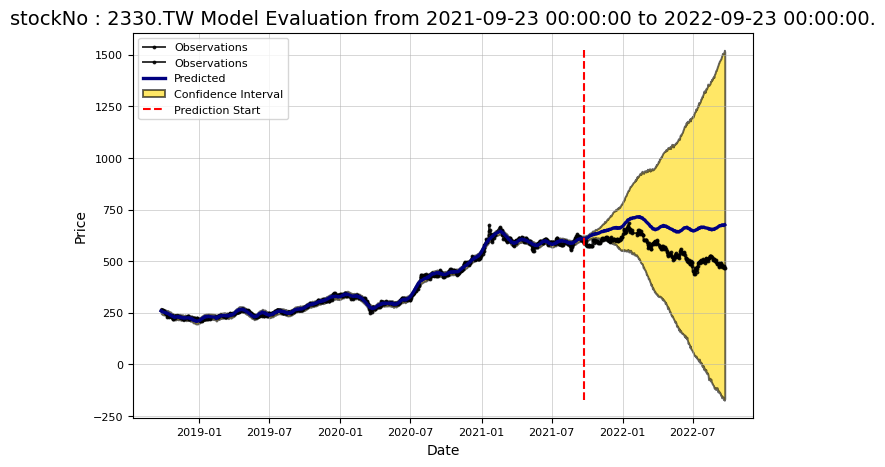

In [11]:
stock.evaluate_prediction()